In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import NLTK and download the stopwords list
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('/kaggle/input/south-asian-language-detection/Data.csv')

In [4]:
df.head()

,Data,Label
0,tob eghotonati onekei mittha bolechen.,Bengali
1,The book of the lover and the beloved,Bengali
2,open bsd,Bengali
3,Dole tini muloto danhati medium bowler hishebe...,Bengali
4,Bortomane bangladesher 8ti bibhager ontorgoto ...,Bengali


In [5]:
df.dropna(inplace=True)

In [6]:
df.info

<bound method DataFrame.info of                                                      Data    Label
0                  tob eghotonati onekei mittha bolechen.  Bengali
1                   The book of the lover and the beloved  Bengali
2                                                open bsd  Bengali
3       Dole tini muloto danhati medium bowler hishebe...  Bengali
4       Bortomane bangladesher 8ti bibhager ontorgoto ...  Bengali
...                                                   ...      ...
129093  Although Casper van Dien and Michael Rooker ar...  English
129094  I liked this movie. I wasn't really sure what ...  English
129095  Yes non-Singaporean's can't see what's the big...  English
129096  As far as films go, this is likable enough. En...  English
129097  I saw Anatomy years ago -- dubbed at a friends...  English

[129098 rows x 2 columns]>

In [7]:
# Shuffle the DataFrame randomly
df = df.sample(frac=1, random_state=42)

In [8]:
df["Label"].value_counts()

Label
English      10000
Kannada       9978
Gujarati      9967
Bengali       9964
Malayalam     9964
Sindhi        9962
Sinhala       9958
Punjabi       9954
Marathi       9941
Telugu        9929
Tamil         9924
Hindi         9917
Urdu          9640
Name: count, dtype: int64

In [9]:
# Define a function to clean non-English text
def clean_non_english(text, label):
    if label == 'English':
        return text
    else:
        # Tokenize the text into words
        words = nltk.word_tokenize(text)
        
        # Filter out stopwords and non-English words
        english_words = [word for word in words if word.lower() not in stopwords.words('english')]

        # Reconstruct the cleaned text from the filtered words
        cleaned_text = ' '.join(english_words)
        
        return cleaned_text

In [10]:
# Apply the cleaning function to the 'Data' column
df['Data'] = df.apply(lambda row: clean_non_english(row['Data'], row['Label']), axis=1)

In [11]:
# Filter out rows where 'Data' is empty after cleaning
filtered_df = df[df['Data'].str.strip() != '']

In [12]:
# Reset the index of the filtered DataFrame
filtered_df.reset_index(drop=True, inplace=True)

In [13]:
filtered_df["Label"].value_counts()

Label
English      10000
Kannada       9978
Gujarati      9967
Malayalam     9964
Bengali       9963
Sindhi        9960
Sinhala       9958
Punjabi       9954
Marathi       9939
Telugu        9928
Tamil         9924
Hindi         9917
Urdu          9638
Name: count, dtype: int64

In [14]:
text = filtered_df['Data'].values.tolist()
label = filtered_df['Label'].tolist()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , label, test_size=0.2, stratify=label, random_state=42)

In [16]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 43.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 52.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.38.0-py3-none-any.whl size=25319964 sha256=24e63b9b38

In [17]:
longest_string = max(df['Data'], key=len)
print(len(longest_string))

10787


In [18]:
import ktrain
from ktrain import text
MODEL_NAME = 'xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [19]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: id
train sequence lengths:
	mean : 32
	95percentile : 143
	99percentile : 407


Is Multi-Label? False
preprocessing test...
language: id
test sequence lengths:
	mean : 31
	95percentile : 144
	99percentile : 394


In [20]:
model = t.get_classifier()

In [21]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [22]:
history = learner.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
12909/12909 [==============================] - 8308s 640ms/step - loss: 0.6291 - accuracy: 0.8179 - val_loss: 0.2733 - val_accuracy: 0.9106
Epoch 2/5
12909/12909 [==============================] - 8276s 641ms/step - loss: 0.2713 - accuracy: 0.9132 - val_loss: 0.2326 - val_accuracy: 0.9270
Epoch 3/5
12909/12909 [==============================] - 8287s 642ms/step - loss: 0.2283 - accuracy: 0.9256 - val_loss: 0.2316 - val_accuracy: 0.9304
Epoch 4/5
12909/12909 [==============================] - 8291s 642ms/step - loss: 0.1720 - accuracy: 0.9452 - val_loss: 0.1983 - val_accuracy: 0.9381
Epoch 5/5
12909/12909 [==============================] - 8298s 643ms/step - loss: 0.1211 - accuracy: 0.9609 - val_loss: 0.1955 - val_accuracy: 0.9435


In [23]:
cm = learner.validate(class_names=t.get_classes())

807/807 [==============================] - 548s 676ms/step
              precision    recall  f1-score   support

     Bengali       0.94      0.95      0.94      1993
     English       1.00      1.00      1.00      2000
    Gujarati       0.96      0.96      0.96      1993
       Hindi       0.93      0.90      0.91      1983
     Kannada       0.96      0.95      0.95      1996
   Malayalam       0.96      0.92      0.94      1993
     Marathi       0.89      0.92      0.91      1988
     Punjabi       0.95      0.94      0.94      1991
      Sindhi       0.98      0.96      0.97      1992
     Sinhala       0.98      0.96      0.97      1991
       Tamil       0.95      0.95      0.95      1985
      Telugu       0.89      0.92      0.91      1986
        Urdu       0.89      0.94      0.92      1927

    accuracy                           0.94     25818
   macro avg       0.94      0.94      0.94     25818
weighted avg       0.94      0.94      0.94     25818



In [24]:
def PlotGraph(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(acc) + 1)
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'g', label='Training acc')
  plt.plot(x, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'g', label='Training loss')
  plt.plot(x, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

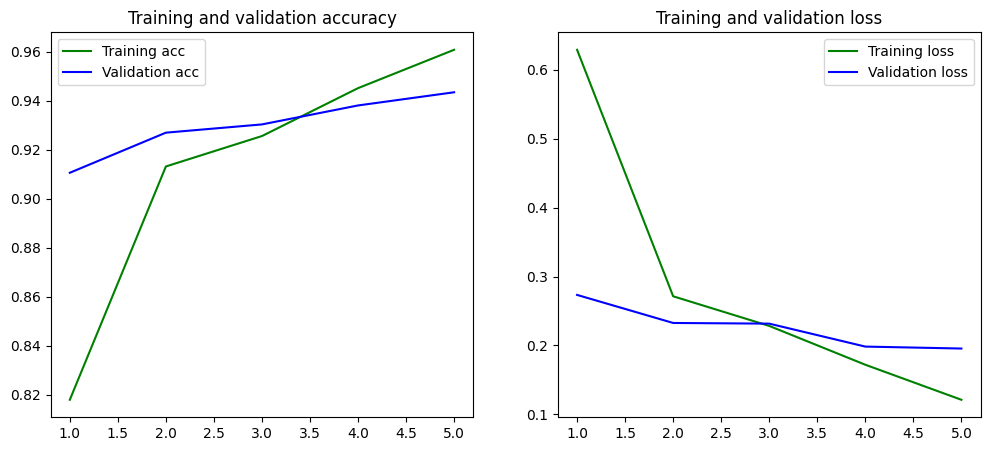

In [25]:
PlotGraph(history)

In [26]:
predictor=ktrain.get_predictor(learner.model, preproc=t)

In [27]:
# Save the trained model
learner.save_model('/kaggle/working/lan_det')

In [28]:
!zip -r mental.zip /kaggle/working/lan_det

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  adding: kaggle/working/lan_det/ (stored 0%)
  adding: kaggle/working/lan_det/tf_model.h5 (deflated 27%)
  adding: kaggle/working/lan_det/config.json (deflated 58%)
